In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim.lr_scheduler as lr_scheduler 
import numpy as np
import torch.nn.functional as F

In [3]:
df=pd.read_csv("/content/drive/MyDrive/international_matches.csv")
df.iloc[-10::]

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,No,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,...,No,Win,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,No,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2
23914,2022-06-14,Luxembourg,Faroe Islands,Europe,Europe,94,124,1229,1137,2,...,No,Draw,69.0,NaN,68.5,NaN,69.8,NaN,NaN,NaN
23915,2022-06-14,Turkey,Lithuania,Europe,Europe,43,138,1461,1092,2,...,No,Win,79.0,71.0,78.2,76.7,78.2,NaN,NaN,NaN
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


In [4]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

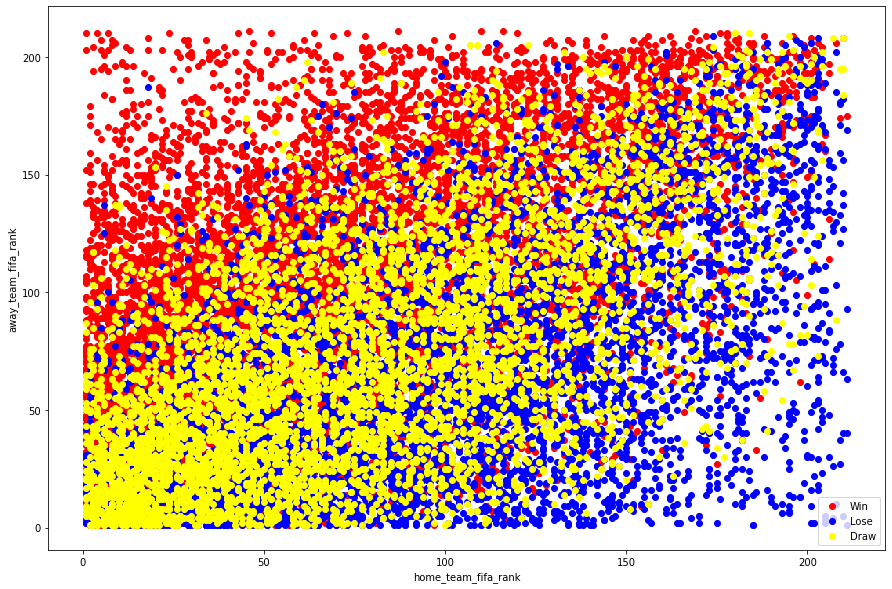

In [5]:
x=df[df['home_team_result']=='Win']['home_team_fifa_rank'].values
y=df[df['home_team_result']=='Win']['away_team_fifa_rank'].values
plt.figure(figsize=(15,10))
plt.xlabel('home_team_fifa_rank')
plt.ylabel('away_team_fifa_rank')
plt.scatter(x,y,c='red')
x=df[df['home_team_result']=='Lose']['home_team_fifa_rank'].values
y=df[df['home_team_result']=='Lose']['away_team_fifa_rank'].values
plt.scatter(x,y,c='blue')
x=df[df['home_team_result']=='Draw']['home_team_fifa_rank'].values
y=df[df['home_team_result']=='Draw']['away_team_fifa_rank'].values
plt.scatter(x,y,c='yellow')
plt.legend(['Win','Lose','Draw'])

In [6]:
Dfnew=df[['home_team_total_fifa_points','home_team_fifa_rank','away_team_total_fifa_points','away_team_fifa_rank','home_team_result']].copy()
Dfnew.drop(Dfnew[(Dfnew['home_team_total_fifa_points']==0) | (Dfnew['away_team_total_fifa_points']==0)].index,inplace=True)

In [7]:
Y=Dfnew['home_team_result'].values
Onehot_label=np.zeros((len(Y),3))
Y[Y=='Win']=0
Y[Y=='Lose']=1
Y[Y=='Draw']=2
Onehot_label[np.arange(len(Y)),Y.astype(int)]=1

X=Dfnew[['home_team_total_fifa_points','home_team_fifa_rank','away_team_total_fifa_points','away_team_fifa_rank']].values
X_train, X_test, y_train, y_test =train_test_split(X,Onehot_label,test_size=0.25)
min_train=np.min(X_train,axis=0)
max_train=np.max(X_train,axis=0)

X_train = torch.tensor((X_train-min_train)/(max_train-min_train)).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor((X_test-min_train)/(max_train-min_train)).float()
y_test = torch.tensor(y_test).float()
# mean_train=np.mean(X_train,axis=0)
# std_train=np.std(X_train,axis=0)

# X_train = torch.tensor((X_train-mean_train)/(std_train)).float()
# y_train = torch.tensor(y_train).float()
# X_test = torch.tensor((X_test-mean_train)/(std_train)).float()
# y_test = torch.tensor(y_test).float()


# X_train = torch.tensor(X_train).float()
# y_train = torch.tensor(y_train).float()
# X_test = torch.tensor(X_test).float()
# y_test = torch.tensor(y_test).float()

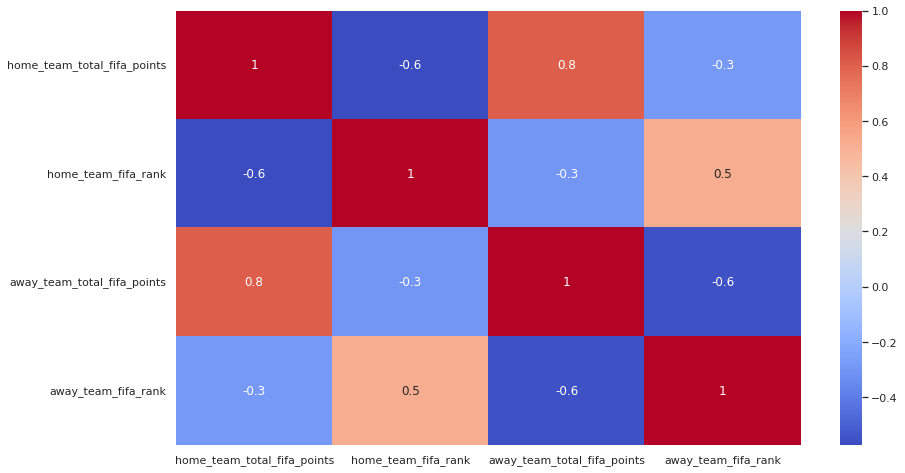

In [8]:
plt.figure(figsize=(14,8))
sns.set_theme(style="dark")
corr = Dfnew[['home_team_total_fifa_points','home_team_fifa_rank','away_team_total_fifa_points','away_team_fifa_rank']].corr()
heatmap = sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.1g')

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()

        self.input_layer=nn.Linear(4,10)
        self.hidden_layer1=nn.Linear(10,20)
        self.hidden_layer2=nn.Linear(20,8)
        self.output_layer=nn.Linear(8,3)
        nn.init.xavier_uniform_(self.input_layer.weight)
        nn.init.xavier_uniform_(self.hidden_layer1.weight)
        nn.init.xavier_uniform_(self.hidden_layer2.weight)
        nn.init.xavier_uniform_(self.output_layer.weight)

    def forward(self,x):
        x = F.relu(self.input_layer(x))
        x = F.relu(self.hidden_layer1(x))
        x = F.relu(self.hidden_layer2(x))
        x = self.output_layer(x)
        return x

In [10]:
def Acc(output,true_labels):
    correct=0
    for i,j in zip(output,true_labels):
        if torch.argmax(i)==torch.argmax(j):
            correct+=1
    return correct/len(output)
def Train(model,lr,batch_size,Epochs,X_train, X_test, y_train, y_test):
  best_model=[]
  best_Acc=0
  model=nn.DataParallel(model,device_ids=[0])
  x_batch = torch.utils.data.DataLoader(X_train,batch_size=batch_size,shuffle=False)
  x_test_batch = torch.utils.data.DataLoader(X_test,batch_size=batch_size,shuffle=False)
  y_batch = torch.utils.data.DataLoader(y_train,batch_size=batch_size,shuffle=False)
  y_test_batch = torch.utils.data.DataLoader(y_test,batch_size=batch_size,shuffle=False)


  criterion=nn.CrossEntropyLoss()
  optimizer=torch.optim.Adam(model.parameters(),lr=lr,weight_decay=1e-2)
  scheduler=lr_scheduler.CosineAnnealingLR(optimizer,T_max=Epochs,eta_min=1e-4)
  Train_Acc_array=[]
  Test_Acc_array=[]
  Train_Lr=[]
  for i in range(Epochs):
    # ****************** Training *******************
    model.train()
    Loss_train=[]
    Acc_train=[]
    pred_train=[]
    print(f'###################### Epoch {i} #####################')
    for data,label in zip(x_batch,y_batch):
        x,y=data.cuda(),label.cuda()
        optimizer.zero_grad()
        output=model(x)
        Loss=criterion(output,y)
        Loss.backward()
        optimizer.step()
        Loss_train.append(Loss)
        
        Acc_train.append(Acc(output,y))
    Train_Lr.append(scheduler.get_last_lr())
    scheduler.step()
    Train_Acc_array.append(torch.mean(torch.tensor(Acc_train)))
    print(f'Train Cross Entropy Loss {torch.mean(torch.tensor(Loss_train))}')
    print(f'Train Accuracy is {Train_Acc_array[-1]*100}')
    # ****************** Test  *******************
    model.eval()
    Loss_test=[]
    Acc_test=[]
    for data,label in zip(x_test_batch,y_test_batch):
        x,y=data.cuda(),label.cuda()
        output=model(x)
        Loss=criterion(output,y)
        Loss_test.append(Loss)
        Acc_test.append(Acc(output,y))
    Test_Acc_array.append(torch.mean(torch.tensor(Acc_test)))
    if best_Acc < Test_Acc_array[-1] :
      best_Acc=Test_Acc_array[-1]
      best_model=model
    print(f'Test Cross Entropy Loss {torch.mean(torch.tensor(Loss_test))}')
    print(f'Test Accuracy is {Test_Acc_array[-1]*100}')
    print('#######################################################')
  return Train_Acc_array,Test_Acc_array,best_model,Train_Lr



###################### Epoch 0 #####################
Train Cross Entropy Loss 1.0634857416152954
Train Accuracy is 43.147850036621094
Test Cross Entropy Loss 1.0141756534576416
Test Accuracy is 48.829769134521484
#######################################################
###################### Epoch 1 #####################
Train Cross Entropy Loss 1.0247101783752441
Train Accuracy is 48.26638412475586
Test Cross Entropy Loss 1.0091853141784668
Test Accuracy is 48.829769134521484
#######################################################
###################### Epoch 2 #####################
Train Cross Entropy Loss 1.0204106569290161
Train Accuracy is 48.26638412475586
Test Cross Entropy Loss 1.0035381317138672
Test Accuracy is 48.829769134521484
#######################################################
###################### Epoch 3 #####################
Train Cross Entropy Loss 1.0152391195297241
Train Accuracy is 48.26638412475586
Test Cross Entropy Loss 0.9951974153518677
Test Accuracy is 48

Text(0, 0.5, 'Learning rate')

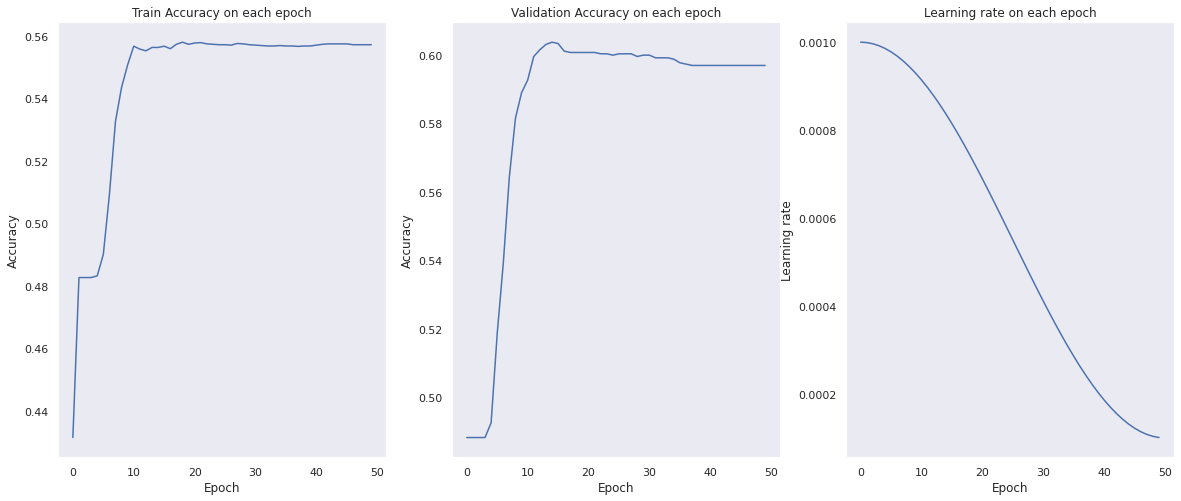

In [11]:
model=Net()
Train_Acc_array,Test_Acc_array,best_model,Train_Lr=Train(model=model,lr=1e-3,batch_size=256,Epochs=50,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.plot(Train_Acc_array)
plt.title('Train Accuracy on each epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.subplot(1,3,2)
plt.plot(Test_Acc_array)
plt.title('Validation Accuracy on each epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.subplot(1,3,3)
plt.plot(Train_Lr)
plt.title('Learning rate on each epoch')
plt.xlabel('Epoch')
plt.ylabel('Learning rate')

Best Model

In [12]:
best_model.eval()

Test_Acc_array=[]
output=best_model(X_test)
Acc_test=Acc(output,y_test)

print(f'Test Accuracy is {Acc_test*100}')

Test Accuracy is 59.60817007086286


Prediction of Iran 's games

In [16]:
game_1=[1728.47,5,1564.61,20] # England vs Iran
game_2=[1569.82,19,1564.61,20] # wales vs Iran
game_3=[1564.61,20,1627.48,16] # Iran vs USA

games=[game_1,game_2,game_3]
softmax=torch.nn.Softmax(dim=1)
prediction=softmax(best_model(torch.tensor(games).cuda()))
idx=torch.argmax(prediction,dim=1)
if idx[0]==0:
  print("England wins over iran")
else :
  print("iran wins over England")
if idx[1]==0:
  print("wales wins over iran")
else :
  print("iran wins over Wales")
if idx[2]==0:
  print("iran wins over USA")
else :
  print("USA wins over iran")
print(prediction.detach().cpu())
iran_wins_prob=prediction[[0,1,2],[1,1,0]]
print("Iran Wins probability")
print(iran_wins_prob.detach().cpu())

England wins over iran
wales wins over iran
USA wins over iran
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 4.4505e-38, 0.0000e+00],
        [1.6219e-07, 1.0000e+00, 0.0000e+00]])
Iran Wins probability
tensor([0.0000e+00, 4.4505e-38, 1.6219e-07])


In [15]:
game_4=[1728.47,5,1569.82,19] # England vs wales
game_5=[1569.82,19,1627.48,16] # wales vs USA
game_6=[1627.48,16,1728.47,5] # USA vs England

games=[game_4,game_5,game_6]
softmax=torch.nn.Softmax(dim=1)
prediction=softmax(best_model(torch.tensor(games).cuda()))
idx=torch.argmax(prediction,dim=1)

if idx[0]==0:
  print("England wins over wales")
else :
  print("wales wins over England")
if idx[1]==0:
  print("wales wins over USA")
else :
  print("USA wins over Wales")
if idx[2]==0:
  print("USA wins over England")
else :
  print("England wins over USA")



England wins over wales
USA wins over Wales
England wins over USA
